In [4]:
from ann_models import model_store
import pandas as pd

a = model_store()

test_model = a.get_models(2005)
print(len(a.get_models(2005)))



/Users/xander/Desktop/github/senior_thesis/ann_models.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taq_df['MID_PRICE'] = (taq_df['BID'] + taq_df['ASK']) / 2
/Users/xander/Desktop/github/senior_thesis/ann_models.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taq_df['TRADE_DIRECTION'] = taq_df.apply(lee_ready_algorithm, axis=1)
/Users/xander/Desktop/github/senior_thesis/ann_models.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

82


/Users/xander/Desktop/github/senior_thesis/ann_models.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taq_df['MID_PRICE'] = (taq_df['BID'] + taq_df['ASK']) / 2
/Users/xander/Desktop/github/senior_thesis/ann_models.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taq_df['TRADE_DIRECTION'] = taq_df.apply(lee_ready_algorithm, axis=1)
/Users/xander/Desktop/github/senior_thesis/ann_models.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

In [2]:
# test
print(test_model.mu_hat)
print(test_model.sigma_squared_hat)

0.0004314220798041241
4.962507452981223e-06


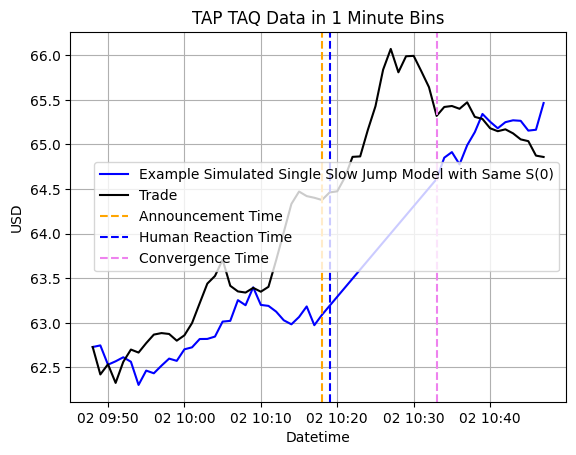

In [3]:
test_model.plot_single_slow_jump_model_simulation()


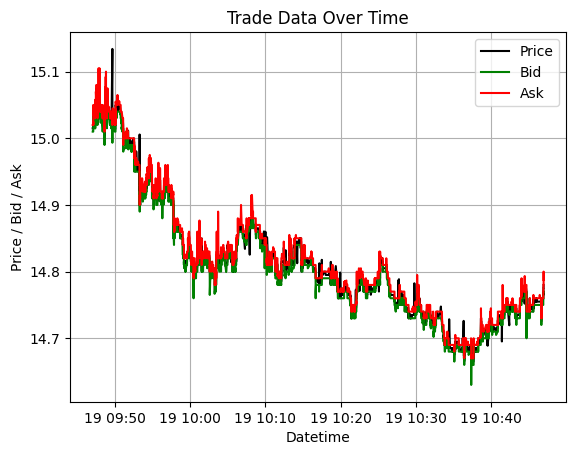

None


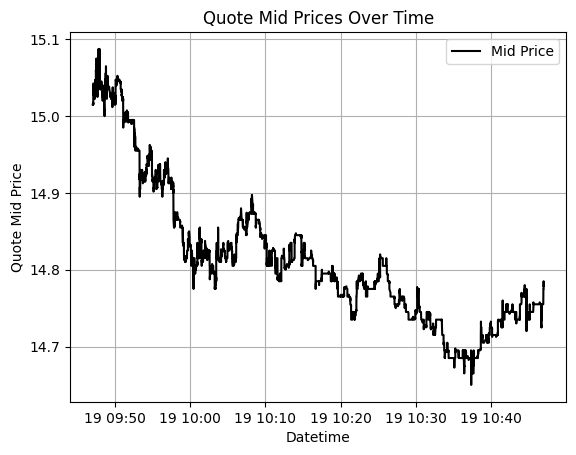

None


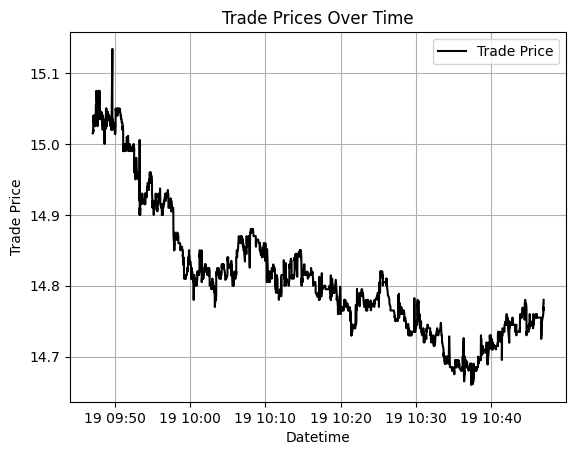

None


In [5]:
i = 8
print(a.get_models()[i].plot_trades_and_quotes())
print(a.get_models()[i].plot_midpoint_prices())
print(a.get_models()[i].plot_trade_prices())